In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import importlib
import math
import Chronos


In [4]:
def make_train_df():
    y_data = pd.date_range('2018-01-01', '2019-01-01').astype(np.int64)/(1e9*60*60*24)

    train_df = pd.DataFrame(data={"ds": pd.date_range('2018-01-01', '2019-01-01'),
                                  "y" : np.sin(y_data*2*math.pi/365.25)})
    return train_df
    

In [5]:
train_df = make_train_df()
train_df

,ds,y
0,2018-01-01,-1.175661e-14
1,2018-01-02,1.720158e-02
2,2018-01-03,3.439806e-02
3,2018-01-04,5.158437e-02
4,2018-01-05,6.875541e-02
...,...,...
361,2018-12-28,-7.304519e-02
362,2018-12-29,-5.587876e-02
363,2018-12-30,-3.869579e-02
364,2018-12-31,-2.150137e-02


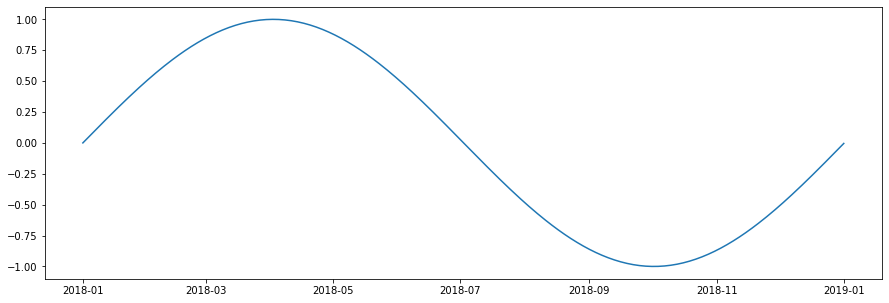

In [6]:
plt.figure(figsize=(15,5))
plt.plot(train_df['ds'], train_df['y'])
plt.show()

In [7]:
importlib.reload(Chronos)
train_df = make_train_df()
my_cr = Chronos.Chronos(G=1000,
                        p_m= 0.1, 
                        r_m = 0.1,
                        yearly_seasonality=5,
                        weekly_seasonality=1)
my_cr = my_cr.fit(train_df)

population initalized


In [8]:
result_df = my_cr.predict(train_df)
print(result_df.head())

          ds             y      yhat
0 2018-01-01 -1.175661e-14       NaN
1 2018-01-02  1.720158e-02       NaN
2 2018-01-03  3.439806e-02       NaN
3 2018-01-04  5.158437e-02 -0.116849
4 2018-01-05  6.875541e-02 -0.097563


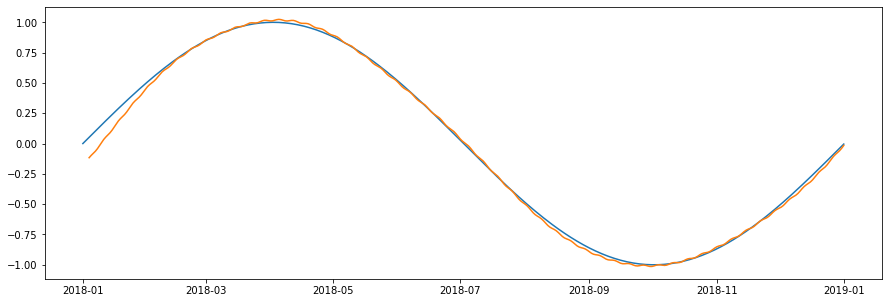

{'growth::const': -0.103595323640367,
 'growth::coef': 0.00048490220943534813,
 'yearly::order_1_coef': (-0.2923662524415923, 0.005566151703093672),
 'yearly::order_2_coef': (0.012681506635801976, -0.023189345190192313),
 'yearly::order_3_coef': (0.006172998855114686, -0.02404456553016153),
 'yearly::order_4_coef': (0.01140819043713897, -0.0036307275478367484),
 'yearly::order_5_coef': (0.0014916339980327667, -0.0109174784489834),
 'weekly::order_1_coef': (0.0021925475838305564, -0.005184601247618027),
 'AR::order_1_coef': 1.063746752166878,
 'AR::order_2_coef': 0.6566206665853684,
 'AR::order_3_coef': -0.3659734808608737}

In [9]:
plt.figure(figsize=(15,5))
plt.plot(result_df['ds'], result_df['y'])
plt.plot(result_df['ds'], result_df['yhat'])
plt.show()
my_cr.get_params()

In [10]:
df = pd.read_csv('data/prophetData.csv')
df['ds'] = pd.to_datetime(df['ds'])
df.head()
df = df[-800:]
#df['y'] = df['y']*100

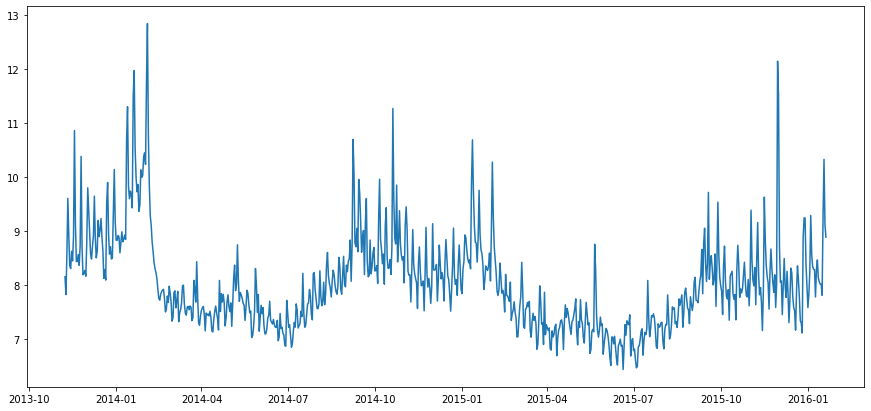

In [11]:
plt.figure(figsize=(15,7))
plt.plot(df['ds'], df['y'])
plt.show();

In [12]:
validation_fraction = 0.2

validation_size = int(df.shape[0] * validation_fraction)
train_df = df.iloc[:-validation_size]
validation_df = df.iloc[-validation_size:]
print(train_df.shape)
print(validation_df.shape)

(640, 2)
(160, 2)


In [13]:
train_df

,ds,y
2105,2013-11-08,8.157657
2106,2013-11-09,7.829233
2107,2013-11-10,8.573952
2108,2013-11-11,9.611329
2109,2013-11-12,8.923858
...,...,...
2740,2015-08-08,7.007601
2741,2015-08-09,7.073270
2742,2015-08-10,7.265430
2743,2015-08-11,7.602401


In [14]:
def MPE(y_true, y_pred_matrix):
    difference = np.abs(y_true - y_pred_matrix) # result is (n_individuals, n_obs)
    quotient = difference / y_true
    
    result = np.nanmean(quotient, axis=1)
    
    return result
    

In [81]:
importlib.reload(Chronos)
train_df = df.iloc[:-validation_size]
validation_df = df.iloc[-validation_size:]

#my_cr = Chronos.Chronos(G=1000, evaluation_function="MAE", AR_order=1)
my_cr = Chronos.Chronos(G=1000, evaluation_function=MPE, AR_order=0)
my_cr = my_cr.fit(train_df)

population initalized


In [82]:
result_df = my_cr.predict(validation_df)
result_df.head()

,ds,y,yhat
2745,2015-08-13,7.582229,8.111133
2746,2015-08-14,7.289611,8.156194
2747,2015-08-15,7.330405,7.860337
2748,2015-08-16,7.221105,8.051068
2749,2015-08-17,7.431300,8.341678


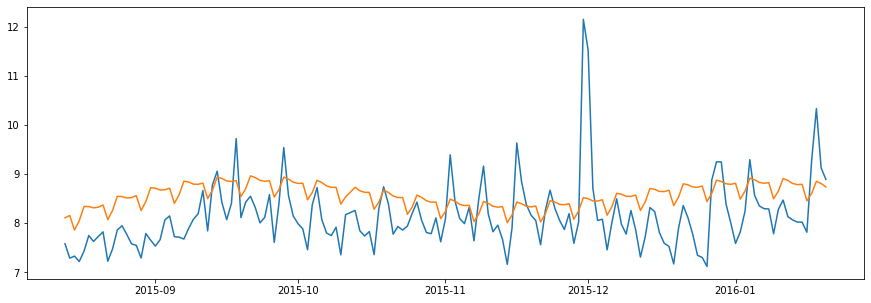

{'growth::const': 8.06273976075168,
 'growth::coef': -0.0003941206078684374,
 'yearly::order_1_coef': (-0.47132347609488123, 0.5324098478608331),
 'yearly::order_2_coef': (0.11141934684599954, -0.05428693063480483),
 'yearly::order_3_coef': (0.20471957921261613, 0.27133526124966356),
 'weekly::order_1_coef': (0.1407549729572798, 0.030911596640766856),
 'weekly::order_2_coef': (0.025166611313605994, 0.1143529208393005),
 'weekly::order_3_coef': (-0.04939908209795252, -0.0026165475192651416)}

In [83]:
plt.figure(figsize=(15,5))
plt.plot(result_df['ds'], result_df['y'])
plt.plot(result_df['ds'], result_df['yhat'])
plt.show()
my_cr.get_params()

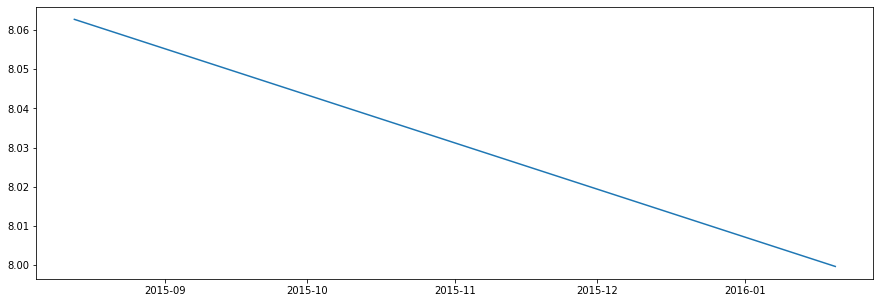

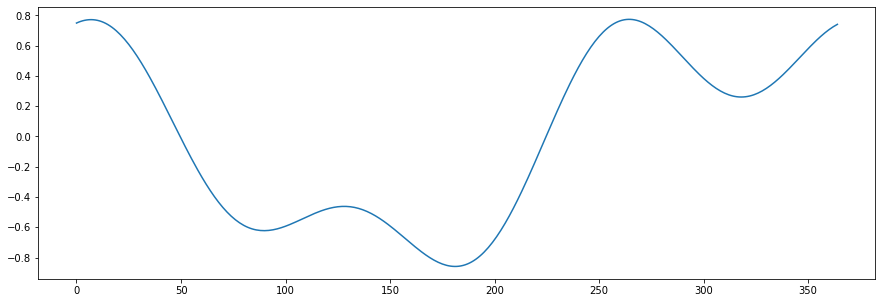

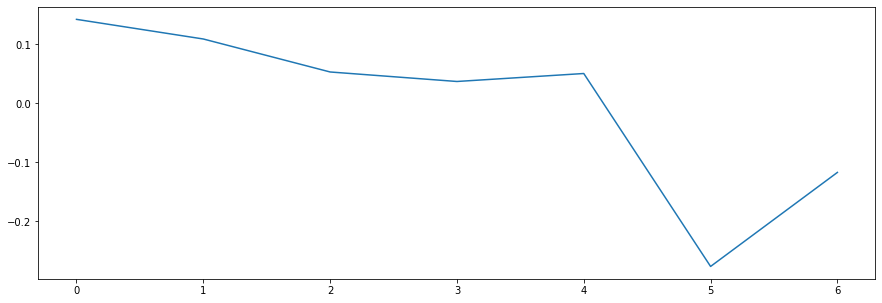

In [84]:
my_cr.plot_components(result_df)